## Analysis of RL Evaluation Performance

In [3]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

### Actuated / Baseline Results

In [ ]:
# load data
df = pd.read_csv('../src/data/actuated_output/actuated_output_9000steps_moreInfo.csv')
df

In [6]:
df = df[df['num_vehicles'] != 0]

In [33]:
df_fifth = df.iloc[::5]

In [34]:
df_fifth.reset_index()

,index,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
0,55,25255,1,['truck_truck'],12.838608,17645.615158,25.612431,0.000000,3.119432,150.140131,5550.657738,75.575247,0.0,0,3.988732e+05,5371.604223,27.320515,44.806304,1956.442650,1.263394e+05,4804.645310,221.0,17,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
1,60,25260,1,['truck_truck'],7.064620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.343767,0.0,0,3.720477e+05,4122.707371,19.970318,49.526361,2198.959203,1.176634e+05,5091.515158,278.0,18,7,3.0,rrrryyyyrrrrrrryrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
2,65,25265,1,['truck_truck'],0.007109,7383.980502,15.203255,0.000000,2.209120,84.907372,2322.743970,67.098727,3.0,1,5.364460e+05,5076.063531,24.775810,70.032470,3285.415646,1.695380e+05,5535.737480,243.0,19,8,19.0,rrrrrrrrggrrrrrrGGGr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
3,70,25270,1,['truck_truck'],0.000000,7380.555556,15.200000,0.000000,2.208889,84.888889,2321.666667,67.110671,8.0,1,5.231367e+05,6111.823041,29.824218,65.103282,2991.846417,1.654361e+05,5932.249679,290.0,26,8,19.0,rrrrrrrrggrrrrrrGGGr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
4,75,25275,1,['truck_truck'],0.000000,7380.555556,15.200000,0.000000,2.208889,84.888889,2321.666667,67.110671,13.0,1,4.153267e+05,6392.851784,30.816651,55.521858,2323.017153,1.314451e+05,6256.475508,371.0,28,8,19.0,rrrrrrrrggrrrrrrGGGr,7,5.0,grrrrrGGgGGgrrrrrrrrrrr,5,11.0,rrrrrrrgrrggrrrrrrggrrr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,8976,34176,55,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.463599,191991.944444,6981.538889,32.779722,29.516028,1065.359722,60850.277778,657.449284,9882.0,53,9.984411e+06,292319.830987,1457.853706,1482.448741,56538.975575,3.162725e+06,152464.685378,267641.0,2272,8,19.0,rrrrrrrrggrrrrrrGGGr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
1783,8981,34181,54,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.257222,191991.944444,6981.538889,32.779722,29.516028,1065.359722,60850.277778,596.450998,10147.0,53,1.000177e+07,291101.794554,1453.918984,1498.346376,57342.001345,3.167829e+06,152526.862407,268796.0,2257,8,19.0,rrrrrrrrggrrrrrrGGGr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
1784,8986,34186,53,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.084173,191084.119552,6778.978260,31.835834,29.471941,1064.842942,60560.632640,598.796319,10151.0,51,1.029555e+07,292308.697267,1454.993101,1534.369757,59157.549933,3.260637e+06,153048.166362,272317.0,2258,8,19.0,rrrrrrrrggrrrrrrGGGr,7,5.0,grrrrrGGgGGgrrrrrrrrrrr,5,11.0,rrrrrrrgrrggrrrrrrggrrr
1785,8991,34191,52,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.164161,196615.992761,6611.946780,30.937813,30.387821,1130.803237,62283.907362,602.204336,10318.0,50,1.016110e+07,294664.732982,1470.273594,1520.624015,58465.232233,3.218116e+06,153107.463604,279051.0,2321,8,19.0,rrrrrrrrggrrrrrrGGGr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,5,11.0,rrrrrrrgrrggrrrrrrggrrr


In [22]:
tls_allStates = df_fifth['tls159_state'].tolist()

# create list of tuples for state transitions
transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

In [23]:
matrix = transition_matrix(transitions, 11)

In [24]:
matrix

[[297, 0, 99, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0],
 [0, 0, 0, 0, 99, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 300, 0, 0, 0, 100, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 98, 0, 0],
 [0, 99, 0, 0, 0, 296, 0, 0, 0, 0, 0],
 [0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0],
 [99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 98, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [17]:
tls_allStates = avg_speed['tls159_state'].tolist()

# create list of tuples for state transitions
transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

In [18]:
matrix = transition_matrix(transitions, 11)

In [19]:
matrix

[[342, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0],
 [0, 80, 0, 0, 0, 0, 0, 20, 0, 0, 0],
 [19, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 76, 0, 19, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 360, 0, 0, 0, 0, 20, 0],
 [0, 0, 0, 0, 0, 38, 0, 0, 0, 0, 19],
 [0, 19, 0, 0, 0, 0, 339, 0, 0, 0, 0],
 [0, 0, 0, 0, 20, 0, 0, 40, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 18, 0, 36, 0, 0],
 [0, 0, 20, 0, 0, 0, 0, 0, 0, 80, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 18, 0, 90]]

In [155]:
df_fifth[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          161339.801676
localCOEmission             4927.398538
localHCEmission               24.341959
localPMxEmission              26.281809
localNOxEmission             979.775610
localNoiseEmission           559.401026
local_fuel_consumption     51093.012194
dtype: float64

In [85]:
df = df.rename(columns={'tls159_state': 'tls_159_state', 'tls160_state': 'tls_160_state', 'tls161_state': 'tls_161_state'})

In [86]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          161659.538171
localCOEmission             4932.733414
localHCEmission               24.395986
localPMxEmission              26.341775
localNOxEmission             982.120171
localNoiseEmission           558.671151
local_fuel_consumption     51194.174864
dtype: float64

In [138]:
df[['localWaitingTime','localStoppedVehicles']].mean()

localWaitingTime        8527.401052
localStoppedVehicles      38.605328
dtype: float64

In [147]:
df.tls159_phase.value_counts()

8     1900
0     1881
5     1878
3      589
6      500
9      500
1      495
7      300
10     300
2      297
4      294
Name: tls159_phase, dtype: int64

In [111]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000
mean,161659.538171,4932.733414,24.395986,26.341775,982.120171,558.671151,51194.174864
std,71148.392174,2107.977845,9.967727,13.882439,518.588792,171.344259,22503.813742
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,112245.933912,3214.353481,16.816778,17.214878,632.097585,452.418422,35540.623180
50%,156939.870355,5042.597812,25.088799,24.077436,891.976657,546.524912,49725.587378
75%,216087.356136,6742.382730,32.307772,36.090041,1376.911273,666.130636,68449.168332
max,358090.949834,9328.203731,49.180591,63.143881,2463.819377,1137.788603,113237.425938


### RL Results

In [15]:
avg_speed = pd.read_csv('../src/data/evaluation/average-speed_df.csv')
queue = pd.read_csv('../src/data/evaluation/queue_df.csv')
waitTime = pd.read_csv('../src/data/evaluation/diff-waiting-time_df.csv')

In [63]:
test_queue = pd.read_csv('../src/data/evaluation/test_queue_df.csv')
test_queue = test_queue[test_queue['num_vehicles'] != 0]

In [65]:
test_queue.mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/757952712.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_queue.mean()


num_vehicles                  32.519685
avg_speed                      1.399265
localCO2Emission          116816.623900
localCOEmission             3426.529211
localHCEmission               17.614146
localPMxEmission              19.242036
localNOxEmission             720.422052
local_fuel_consumption     36985.079498
localNoiseEmission           413.356706
localWaitingTime            3620.063555
localStoppedVehicles          26.903825
dtype: float64

In [71]:
speed_test = pd.read_csv('../src/data/evaluation/test_average-speed_conn1_ep1.csv')
speed_test = speed_test[speed_test['system__local_#vehicles'] != 0]

KeyError: 'system__local_#vehicles'

In [72]:
speed_test

,step,system_total_stopped,system_total_vehicles,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,system_total_CO2,system_total_PMx,system_total_NOx,system_total_noise_emission,system_local_CO2,system_local_CO,system_local_HC,system_local_PMx,system_local_NOx,system_local_noise_emission,system_local_#vehicles,system_local_veh_ids,system_local_veh_types,system_local_avg_speed,system_last_reward,total_brake_traffic_signals,local_acceleration,tls_159_stopped,tls_159_accumulated_waiting_time,tls_159_average_speed,tls_159_braking,tls_159_acceleration,tls_159_controlled_lane_emission,tls_159_phase,tls_159_state,tls_159_reward,tls_160_stopped,tls_160_accumulated_waiting_time,tls_160_average_speed,tls_160_braking,tls_160_acceleration,tls_160_controlled_lane_emission,tls_160_phase,tls_160_state,tls_160_reward,tls_161_stopped,tls_161_accumulated_waiting_time,tls_161_average_speed,tls_161_braking,tls_161_acceleration,tls_161_controlled_lane_emission,tls_161_phase,tls_161_state,tls_161_reward,agents_total_stopped,agents_total_accumulated_waiting_time
0,25200.0,0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,[],NaN,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000e+00,"(array([], dtype=float64), 0.0)",0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,NaN,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],0,rgGgGrrrrrrrrrrrGGrGGrG,NaN,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.0,[],0,ggggggggggrrggggggggggg,NaN,0,0.0
1,25205.0,3,10,0.0,0.000000,3.763735,6.026059e+04,6.911626,256.716778,533.609746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,[],NaN,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000e+00,"(array([], dtype=float64), 0.0)",0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],0,rgGgGrrrrrrrrrrrGGrGGrG,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.0,[],0,ggggggggggrrggggggggggg,0.0,0,0.0
2,25210.0,3,18,0.0,0.000000,5.111425,1.122041e+05,14.615713,676.452800,976.873800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,[],NaN,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000e+00,"(array([], dtype=float64), 0.0)",0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],0,rgGgGrrrrrrrrrrrGGrGGrG,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.0,[],0,ggggggggggrrggggggggggg,0.0,0,0.0
3,25215.0,3,25,0.0,0.000000,6.669874,1.433903e+05,17.797962,839.234410,1370.405577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,[],NaN,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000e+00,"(array([], dtype=float64), 0.0)",0.000000,[],0,rrrrrrrrggrrrrrrGGGr,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],0,grrrrrGGgGGgrrrrrrrrrrr,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.0,[],0,ggggggggggrrggggggggggg,0.0,0,0.0
4,25220.0,5,33,0.0,0.000000,5.801106,1.284188e+05,17.136333,799.844924,1690.225023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,[],NaN,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000e+00,"(array([], dtype=float64), 0.0)",0.000000,[],0,rrrrrrrrggrrrrrrGGGr,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],0,grrrrrGGgGGgrrrrrrrrrrr,0.0,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.0,[],0,ggggggggggrrggggggggggg,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,34180.0,2481,3036,10966.0,255.023256,1.176235,1.023983e+07,1546.188660,58393.508033,156079.897236,234372.343543,8323.224609,44.235551,36.360962,1306.372735,914.538940,2085.0,"['truck3602', 'veh14487', 'veh14485', 'veh1443...","['truck3602', 'veh14487', 'veh14485', 'veh1443...",5.142155,-22.333333,-1.496311,0.391469,42,22734.0,1.093620e-03,"(array([-3.59925490e-01, -5.11806692e-02, -4.5...",0.391469,"{'CO2_emission': 232

In [62]:
test

,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,actions
11,1,['truck_truck'],10.508244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.690391,0.0,0,[1 1 5]
12,1,['truck_truck'],0.001382,7381.205975,15.200616,0.000000,2.208932,84.892361,2321.871253,67.064368,3.0,1,[1 4 5]
13,1,['truck_truck'],0.000000,7380.555556,15.200000,0.000000,2.208889,84.888889,2321.666667,67.110671,8.0,1,[1 2 5]
16,1,['truck_truck'],6.624874,21873.821580,30.793441,0.000000,3.788647,190.404347,6880.901024,75.126245,0.0,0,[1 1 5]
17,1,['truck_truck'],11.109329,36227.552918,46.397820,0.000000,5.406305,297.320926,11396.279556,78.772083,0.0,0,[1 5 5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,84,"['bike_bicycle', 'DEFAULT_VEHTYPE', 'DEFAULT_V...",0.054161,302963.303094,10505.017480,50.340533,46.059165,1687.564424,96019.434798,808.545616,32028.0,83,[1 5 6]
1795,86,"['bike_bicycle', 'DEFAULT_VEHTYPE', 'DEFAULT_V...",0.251903,302963.303350,10505.017520,50.340533,46.059165,1687.564424,96019.434880,860.266391,32443.0,83,[1 5 6]
1796,85,"['DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', 'DEFAUL...",0.164107,305578.933604,10668.568748,51.146627,46.124568,1688.762943,96853.756922,864.084363,32859.0,84,[1 2 6]
1797,84,"['DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', 'DEFAUL...",0.165360,302963.299918,10505.016982,50.340531,46.059164,1687.564422,96019.433785,808.545653,33273.0,83,[1 5 1]


In [73]:
speed_test.mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/925940644.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  speed_test.mean()


step                                     2.970000e+04
system_total_stopped                     1.105015e+03
system_total_vehicles                    1.678453e+03
system_total_waiting_time                6.118160e+03
system_mean_waiting_time                 1.422828e+02
system_mean_speed                        2.830881e+00
system_total_CO2                         6.085239e+06
system_total_PMx                         8.833500e+02
system_total_NOx                         3.524212e+04
system_total_noise_emission              8.576387e+04
system_local_CO2                         1.377121e+05
system_local_CO                          4.586841e+03
system_local_HC                          2.343806e+01
system_local_PMx                         2.058074e+01
system_local_NOx                         7.600616e+02
system_local_noise_emission              4.578795e+02
system_local_#vehicles                   1.111700e+03
system_local_avg_speed                   7.717179e+00
system_last_reward          

In [46]:
wt_400_neu = pd.read_csv('../src/data/evaluation/test_waitingTime_400_df.csv')
wt_400_neu = wt_400_neu[wt_400_neu['num_vehicles'] != 0]

In [48]:
wt_400_neu.tls159_phase.unique()

array([0])

In [47]:
wt_400_neu[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          155546.079414
localCOEmission             4907.931901
localHCEmission               26.125325
localPMxEmission              24.329082
localNOxEmission             901.497212
localNoiseEmission           557.471843
local_fuel_consumption     49278.257718
dtype: float64

In [27]:
wt_400 = wt_400[wt_400['num_vehicles'] != 0]

In [45]:
avg_speed.head(100)

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
55,55,1,['truck_truck'],12.838608,17645.615158,25.612431,0.000000,3.119432,150.140131,5550.657738,75.575247,0.0,0,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
56,56,1,['truck_truck'],12.508273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.535690,0.0,0,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
57,57,1,['truck_truck'],12.407087,10954.495837,18.209641,0.000000,2.322919,98.369186,3445.743227,74.272800,0.0,0,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
58,58,1,['truck_truck'],12.698172,20829.061079,29.161285,0.000000,3.507232,175.173691,6552.123116,76.035101,0.0,0,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
59,59,1,['truck_truck'],10.493584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.225200,0.0,0,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,4,"['DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', 'truck_...",6.364949,16405.043552,159.460693,0.867578,2.361896,88.545524,5200.073874,136.621896,13.0,1,8,19.0,rrrrrrrrggrrrrrrGGGr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
162,162,4,"['DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', 'DEFAUL...",6.269991,17728.719076,151.395851,0.855652,2.386542,89.076495,5622.246420,138.834257,14.0,1,8,19.0,rrrrrrrrggrrrrrrGGGr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,3,9.0,ggggggggggrrggggggggggg
163,163,4,"['DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', 'DEFAUL...",6.037486,11178.281868,58.124125,0.282782,2.262638,86.347453,3532.972811,132.634414,15.0,1,8,19.0,rrrrrrrrggrrrrrrGGGr,7,5.0,grrrrrGGgGGgrrrrrrrrrrr,3,9.0,ggggggggggrrggggggggggg
164,164,5,"['DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', 'DEFAUL...",6.013674,14919.570425,211.297810,1.052203,2.317273,87.743323,4726.352345,133.568056,16.0,1,8,19.0,rrrrrrrrggrrrrrrGGGr,7,5.0,grrrrrGGgGGgrrrrrrrrrrr,3,9.0,ggggggggggrrggggggggggg


In [148]:
avg_speed.tls159_phase.value_counts()

8     380
0     361
5     358
3     109
6     100
9     100
1      95
7      60
10     59
2      57
4      54
Name: tls159_phase, dtype: int64

In [125]:
avg_speed.mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_61129/1294388051.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_speed.mean()


Step                        931.600115
num_vehicles                 23.328909
avg_speed                     1.667485
localCO2Emission          83098.679758
localCOEmission            2499.709582
localHCEmission              12.805261
localPMxEmission             11.469360
localNOxEmission            440.967967
local_fuel_consumption    26333.677046
localNoiseEmission          432.972434
localWaitingTime            451.695326
localStoppedVehicles         16.931910
tls159_phase                  4.669359
tls159_phase_duration        13.675707
tls160_phase                  4.066936
tls160_phase_duration        13.605886
tls161_phase                  7.945182
tls161_phase_duration        26.502020
dtype: float64

In [127]:
wt_400.tls159_phase.unique()

array([ 6,  7,  8,  9, 10,  0,  1,  2,  3,  5,  4])

In [16]:
avg_speed = avg_speed[avg_speed['num_vehicles'] != 0]
queue = queue[queue['num_vehicles'] != 0]
waitTime = waitTime[waitTime['num_vehicles'] != 0]

In [ ]:
avg_speed

In [109]:
avg_speed[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          83098.679758
localCOEmission            2499.709582
localHCEmission              12.805261
localPMxEmission             11.469360
localNOxEmission            440.967967
localNoiseEmission          432.972434
local_fuel_consumption    26333.677046
dtype: float64

In [120]:
queue[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          83098.679758
localCOEmission            2499.709582
localHCEmission              12.805261
localPMxEmission             11.469360
localNOxEmission            440.967967
localNoiseEmission          432.972434
local_fuel_consumption    26333.677046
dtype: float64

In [117]:
waitTime[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,83098.679758,2499.709582,12.805261,11.469360,440.967967,432.972434,26333.677046
std,40160.491338,1163.029530,6.204585,7.224968,291.583546,151.532461,12699.633086
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,55472.790462,1675.835393,8.119427,5.379662,192.346080,330.678168,17629.055550
50%,82588.997870,2507.076702,12.681384,11.365350,429.074435,455.219804,26213.090399
75%,114402.642735,3441.734443,17.862218,17.034071,650.646990,533.690592,36248.441812
max,212993.878241,5370.523928,27.319357,32.945388,1431.754918,802.648980,67373.006914


In [110]:
avg_speed[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,83098.679758,2499.709582,12.805261,11.469360,440.967967,432.972434,26333.677046
std,40160.491338,1163.029530,6.204585,7.224968,291.583546,151.532461,12699.633086
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,55472.790462,1675.835393,8.119427,5.379662,192.346080,330.678168,17629.055550
50%,82588.997870,2507.076702,12.681384,11.365350,429.074435,455.219804,26213.090399
75%,114402.642735,3441.734443,17.862218,17.034071,650.646990,533.690592,36248.441812
max,212993.878241,5370.523928,27.319357,32.945388,1431.754918,802.648980,67373.006914


In [ ]:
# Load data

eval_waitTime = pd.read_csv('../src/data/evaluation/waitingTime_200_1800steps_conn1_ep1.csv')
eval_speed = pd.read_csv('../src/data/evaluation/avgSpeed_200_1800steps_conn1_ep1.csv')
eval_queue = pd.read_csv('../src/data/evaluation/queue_200_1800steps_conn1_ep1.csv')
eval_brake = pd.read_csv('../src/data/evaluation/brake_200_1800steps_conn1_ep1.csv')
eval_brakeAccel = pd.read_csv('../src/data/evaluation/brake_acceleration_200_1800steps_conn1_ep1.csv')
eval_emission = pd.read_csv('../src/data/evaluation/emission_200_1800steps_conn1_ep1.csv')
eval_pressure = pd.read_csv('../src/data/evaluation/pressure_200_1800steps_conn1_ep1.csv')

In [49]:
# Remove rows that do not contain any vehicles on the controlled lanes

eval_waitTime = eval_waitTime[eval_waitTime['system_local_#vehicles'] != 0]
eval_speed = eval_speed[eval_speed['system_local_#vehicles'] != 0]
eval_queue = eval_queue[eval_queue['system_local_#vehicles'] != 0]
eval_pressure = eval_pressure[eval_pressure['system_local_#vehicles'] != 0]
eval_brake = eval_brake[eval_brake['system_local_#vehicles'] != 0]
eval_brakeAccel = eval_brakeAccel[eval_brakeAccel['system_local_#vehicles'] != 0]
eval_emission = eval_emission[eval_emission['system_local_#vehicles'] != 0]

In [42]:
eval_waitTime[eval_waitTime['step'] == 25690]

NameError: name 'eval_waitTime' is not defined

In [92]:
# Get average local emission values for evaluation period

print(' Waiting Time')
print(eval_waitTime[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Average Speed')
print(eval_speed[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

# print('Queue ')
# print(eval_queue[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Emission')
print(eval_emission[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

 Waiting Time
system_local_CO2               80516.297835
system_local_CO                 2422.110754
system_local_HC                   12.407020
system_local_PMx                  11.114781
system_local_NOx                 427.319492
system_local_noise_emission      419.441418
dtype: float64
Average Speed
system_local_CO2               80606.360808
system_local_CO                 2424.820050
system_local_HC                   12.420898
system_local_PMx                  11.127213
system_local_NOx                 427.797478
system_local_noise_emission      419.910592
dtype: float64
Emission
system_local_CO2               80606.360808
system_local_CO                 2424.820050
system_local_HC                   12.420898
system_local_PMx                  11.127213
system_local_NOx                 427.797478
system_local_noise_emission      419.910592
dtype: float64


In [50]:

print('Pressure')
print(eval_pressure[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake')
print(eval_brake[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake Accel')
print(eval_brakeAccel[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

Pressure
system_local_CO2               80561.304150
system_local_CO                 2423.464645
system_local_HC                   12.413955
system_local_PMx                  11.120994
system_local_NOx                 427.558352
system_local_noise_emission      419.675874
dtype: float64
Brake
system_local_CO2               80561.304150
system_local_CO                 2423.464645
system_local_HC                   12.413955
system_local_PMx                  11.120994
system_local_NOx                 427.558352
system_local_noise_emission      419.675874
dtype: float64
Brake Accel
system_local_CO2               80606.360808
system_local_CO                 2424.820050
system_local_HC                   12.420898
system_local_PMx                  11.127213
system_local_NOx                 427.797478
system_local_noise_emission      419.910592
dtype: float64


In [13]:
eval_waitTime['system_total_CO2'].mean()

5781524.346246425

### Phase Transition Comparison

In [1]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [79]:
tls_allStates = eval_queue['tls_159_state'].tolist()

In [80]:
set(tls_allStates)

{'GGGGrrrrrrrrrrrrrrrr',
 'GGGgrrrrrrgGgGGrrrGG',
 'GGGgrrrrrrgGgGGrrrrr',
 'rrrrgGGGrrrrrrrGGGrG',
 'rrrrgGGGrrrrrrrGrrrr',
 'rrrrrrrrggrrrrrrGGGr',
 'rrrrrrrrggrrrrrrrrrr',
 'rrrrrrrryyrrrrrrrrrr',
 'rrrryyyyrrrrrrryrrrr',
 'yyygrrrrrryyyyyrrrrr',
 'yyyyrrrrrrrrrrrrrrrr'}

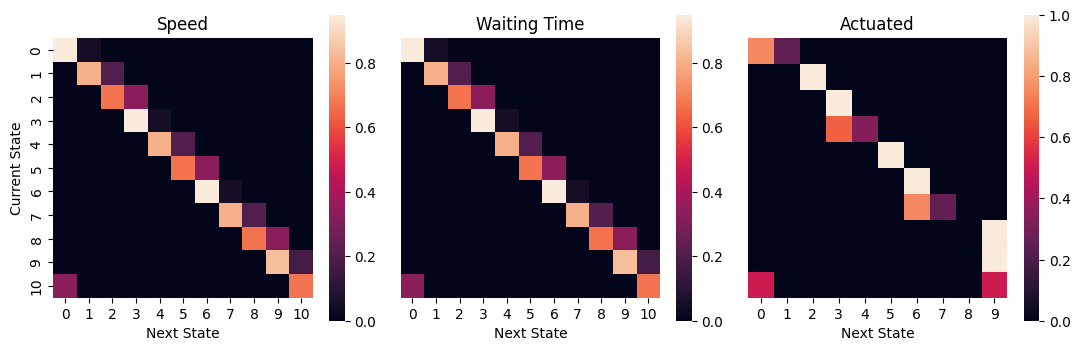

In [40]:
### ------ Phase Transition Matrix tls_159 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(avg_speed, 'Speed'), (wt_400, 'Waiting Time'), (df_fifth, 'Actuated')] # list of dataframes

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (dataframe, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=set(tls_allStates), yticklabels=set(tls_allStates) if i == 0 else "", ax=ax)#, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")

    # append all states collected during training to list
    tls_allStates = dataframe['tls160_phase'].tolist()
    #tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(set(tls_allStates))

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_159_states, axs[i])

# Adjust the spacing between subplots

plt.tight_layout()

# Show the figure
plt.show()


### Polar Plots for Time Spent in State

In [63]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

ValueError: x and y must have same first dimension, but have shapes (12,) and (13,)

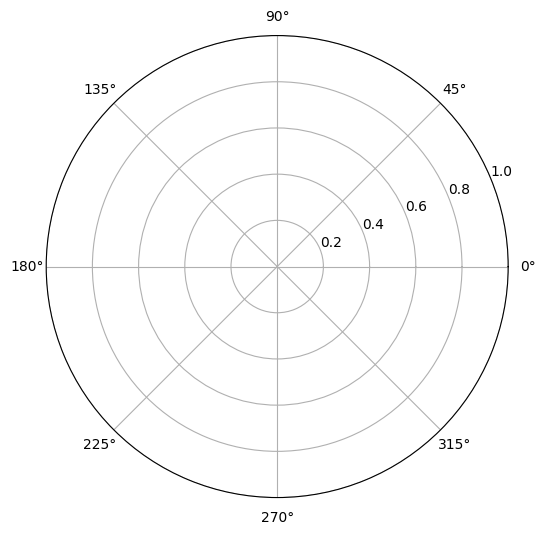

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# List of dataframes and corresponding policies
configs = [(eval_speed, 'Speed'), (eval_queue, 'Queue'), (eval_waitTime, 'Waiting Time'), (df, 'Actuated')]

states = tls_159_states

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls_159_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Repeat the first value to close the circular plot
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy, alpha=0.5)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()
